<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/Hodgkin_Huxley_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

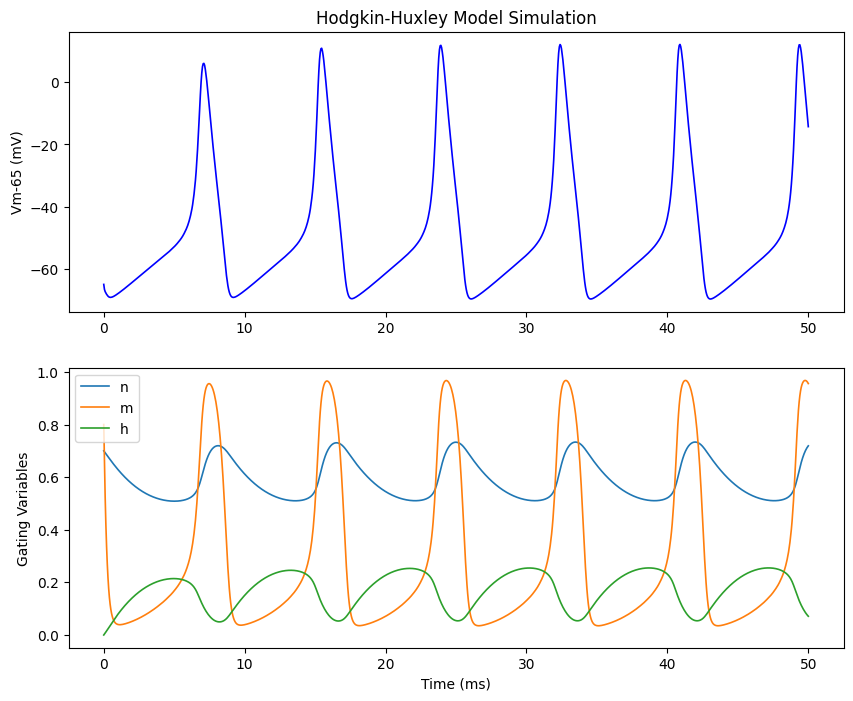

In [6]:
# hodginkin-huxley neuron
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Hodgkin-Huxley model function
def hohu1(t, y, I):
    C = 1; EK = -12; ENa = 120; EL = 10.6; gk = 36; gna = 120; gl = 0.3
    V, n, m, h = y

    # Rate constants
    alpha_n = 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
    beta_n = 0.125 * np.exp(-V / 80)
    alpha_m = 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
    beta_m = 4 * np.exp(-V / 18)
    alpha_h = 0.07 * np.exp(-V / 20)
    beta_h = 1 / (np.exp((30 - V) / 10) + 1)

    # Differential equations
    vdot = (I - gk * n**4 * (V - EK) - gna * m**3 * h * (V - ENa) - gl * (V - EL)) / C
    ndot = alpha_n * (1 - n) - beta_n * n
    mdot = alpha_m * (1 - m) - beta_m * m
    hdot = alpha_h * (1 - h) - beta_h * h

    return [vdot, ndot, mdot, hdot]
# Simulation
I = 50; tspan = (0, 50); initial_conditions = [0, 0.7, 0.8, 0] # V, n, m, h
t_eval = np.linspace(tspan[0], tspan[1], 1000)
solution = solve_ivp(hohu1, tspan, initial_conditions, args=(I,), t_eval=t_eval)
# Plotting results
plt.figure(figsize=(10, 8)); plt.subplot(2, 1, 1)
plt.plot(solution.t, solution.y[0] - 65, 'b', linewidth=1.2)
plt.ylabel('Vm-65 (mV)')
plt.title('Hodgkin-Huxley Model Simulation')
plt.subplot(2, 1, 2)
plt.plot(solution.t, solution.y[1], label='n', linewidth=1.2)
plt.plot(solution.t, solution.y[2], label='m', linewidth=1.2)
plt.plot(solution.t, solution.y[3], label='h', linewidth=1.2)
plt.xlabel('Time (ms)'); plt.ylabel('Gating Variables');
plt.legend(); plt.show()